In [188]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob
import DIC.DIC as dic

path = r'G:\AL IMAGE\CTS_UVon_HSC'
save_path ='G:\AL IMAGE\CTS_UVon_HSC'
image = dic.load_file(path)
print(image.keys())

crack_tip = [[400,207],[397,210],[389,205],[386,200]] # y, x
left, right, up_down = 50,250,150
i = 0
j = 3

dict_keys(['ff3569', 'ff0870', 'ff1999', 'ff2956'])


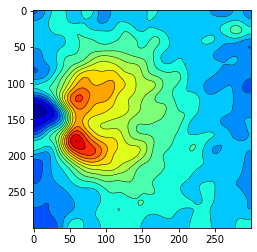

In [216]:
src_reference = image['ff0870'][crack_tip[i][0]-up_down:crack_tip[i][0]+up_down,crack_tip[i][1]-left:crack_tip[i][1]+right]
src_current = image['ff3569'][crack_tip[j][0]-up_down:crack_tip[j][0]+up_down,crack_tip[j][1]-left:crack_tip[j][1]+right]


dst = cv2.subtract(src_current,src_reference)

hist = cv2.calcHist([dst],[0],None,[256],[0,256])
dst = dst.astype(float)

dst = np.where(dst>10, dst*0, dst)
gas = cv2.GaussianBlur(dst,(0,0),10)





plt.imshow(src_current, cmap='gray')
# cs = plt.contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
# plt.axis('off')
cs = plt.contourf(gas, 15, cmap = 'jet')
cs = plt.contour(gas, 15, colors='black', linewidths = 0.5)

plt.savefig(save_path+'/contour.png', dpi=500)


